# Basics of zAI

This small tutorial will guide you through the basics of zAI. zAI is a Python library that allows anyone to perform high-level machine learning tasks, like automatically detecting faces in photographs or translating texts from one language to another, with a single, easy to use command, without any need to know about the underlying technologies.

Before we start, we will set up the environment for the notebook:

In [1]:
import sys
sys.path.append("..")
%matplotlib inline

## 1.- Creating a custom profile photo

Imagine that you are Donald Trump (why not?) and you want to create a custom profile photo for your social media. However, you don't want it to look like every other profile photo; you want it to look like a Picasso painting. Since he died in 1973 and can not paint a portrait for you, you decide to do it yourself.

First you select a picture you like:
[Your selected picture](https://upload.wikimedia.org/wikipedia/commons/thumb/d/df/Donald_Trump_%288566730507%29_%282%29.jpg/1280px-Donald_Trump_%288566730507%29_%282%29.jpg)

And the style you want to give to your custom profile photo, the 1907 self-portrait by Pablo Picasso.

Since you want your profile photo to be a close-up, you need perform the following steps:
* Find and extract the face region from the original picture.
* Give the new picture the style of the Picasso self-portrait.
* Save your new profile photo.

Let's see how easy it is with zAI.


zAI provides classes to work with image, text or sound (coming soon) data. Let's import the module to work with image data:

In [2]:
from zAI import zImage

Now, we can easily create a zImage object from any image file:

In [3]:
myPhoto = zImage('../samples/Donald_Trump_8566730507.jpg')

We have created our first zImage object!
*myPhoto* is now a zImage with methods to easily perform high-level tasks on it. Let's first take a look at our image. We can do this with the 'display' method of our zImage:

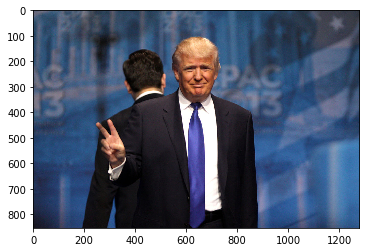

In [4]:
myPhoto.display()

Since we are interested only in the face region, let's begin by finding where the face is located in the image.
In zAI, all methods are pretty intuitive. So, if you want to find faces in a zImage, you just use the *find_faces* method:

In [5]:
myPhoto.find_faces(backend='local')

That's all. Now our zImage has a list of *faces* each of them a dictionary containing all the neccesary meta-information about the face: location, landmark points, etc. But you don't need to care about it, because you are The President of the United States of America and are very busy.
You can use a method to just extract the face region to a new image:

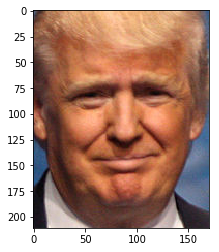

In [6]:
myCloseup = myPhoto.extract_face(margin=15) # margin is the number of pixels we will expand
                                                # the tight face rentangle around the face
myCloseup.display()

Now *myCloseup* is a zFace. A zFace is a special type of zImage with some specific methods to work with faces. For now, let's consider it a zImage.

Now that we have extracted the face region for our profile photo, let's move to adding the Picasso look to it. First, let's load the Picasso self-portrait to a zImage:

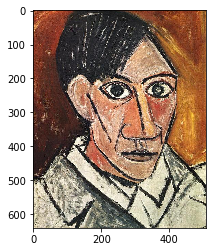

In [7]:
picasso = zImage('../samples/Picasso_ Pablo_ Autorretrato_ 1907.jpg')
picasso.display()

To transfer the style of this painting to our profile photo, we can use the method *style* of our *myCloseup* zImage. It will transfer the appareance of a style image we pass as an argument to the original image creating a new, combined image. This method uses a pretrained model that will be downloaded the first time you use it. In future calls, it will be readily available.


---- RENDERING SINGLE IMAGE ----

INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'
  Objective function value: 521161888.000000
  Number of iterations: 101
  Number of functions evaluations: 109


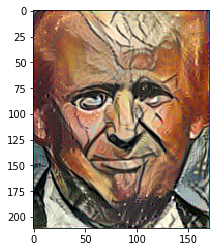

In [8]:
myCustomProfilePhoto = myCloseup.style(picasso) # Note that this may take a while depending on your system
myCustomProfilePhoto.display()

Humm... interesting, to say the least. If you are happy with the result, you can save it to disk:

In [9]:
myCustomProfilePhoto.save('output/ProfilePhoto_PicassoStyle.jpg')

That's all. Just a few lines of code and no need to know about CNNs or anything.

## 2.- Working with different backends

All the operations we performed in our first experiment were performed locally, using models stored on your machine. However, zAI allows you to leverage the power of cloud computing by using the APIs provided by companies like Google or Microsoft.

When you use a zAI method, you can choose if you want to use a local model on your machine, a Google service or a Microsoft service. This is called the *backend*. (Note that, although our medium-term goal is to make all methods available on all three backends, at this point not all backends are supported in all methods.)

To be able to use the *Google* and *Microsoft* backends you'll need to first create accounts on Google Cloud or Microsoft Azure respectively. Then you can activate the services that you need. Please, refer to the documentation of these services to see how to create an account and activate services.

The first time you import zAI, a file called *config.json* will be created in your home folder (On Linux: ~/.zAI/config.json or on Windows: C:/Users/your_user/.zAI/config.json).
This file looks like this:

```
{
  "zAI_BACKEND": "local",
  "MICROSOFT_AZURE_TEXT_TRANSLATION_API_KEY": "",
  "MICROSOFT_AZURE_BING_VOICE_API_KEY": "",
  "MICROSOFT_AZURE_FACE_API_KEY": "",
  "GOOGLE_CLOUD_API_KEY": "",
  "MICROSOFT_AZURE_VISION_API_KEY": "",
  "MICROSOFT_AZURE_URL": ""
}
```

First, we have *zAI_BACKEND* set to *local*. This will be the default backend used if we don't specify otherwise.
Then we have the different API keys used by the different services. We'll see in a moment how to manage these.

Let's do another exercise. First, we will import all the libraries we'll need:

In [10]:
import zAI
from zAI import zImage, zText

We have 3 options to manage the API keys:
* We can edit the *config.json* file and fill the information about the key or keys that we need. The next time we import zAI, it will know that the key is available and will be able to use it transparently.
* We can set the value using the functions in zAI.utils.keys to store it on *config.json*
* we can manually set the value for the rest of the session but not save anything to disk. This way we can use zAI without having our API keys in plain text anywhere in our system.

In [11]:
# We can list the different keys
# zAI.utils.keys.display_available_keys()

# We can set a key and store its value in config.json for future sessions:
# zAI.utils.set_backend_key(key_name='GOOGLE_CLOUD_API_KEY',key_value='***',save=True)

# We set a particular key for this specific session without storing its value on disk:
# zAI.utils.set_backend_key(key_name='GOOGLE_CLOUD_API_KEY',key_value='***')

Let's assume we have our accounts all set up and we have stored our API keys. In this exercise we will do the following:
* Extract the text from an image using OCR
* Translate the text to a different language
* Convert the translated text to voice using speech synthesis

Not bad, huh?

Let's begin by loading our image file:

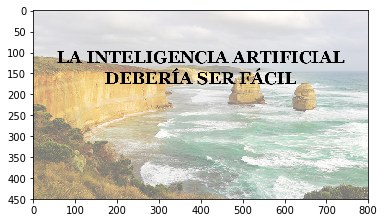

In [12]:
myImage = zImage('../samples/text_over_landscape.png')
myImage.display()

We see black text over a landscape image. Don't worry if you don't speak Spanish, we'll translate it to English in a moment.

(we have taken the background photograph from [here](https://www.goodfreephotos.com/australia/victoria/melbourne/coastal-landscape-in-melbourne-victoria-australia.jpg.php))

To extract the text, we simply use the method *ocr* (from Optical Character Recognition), that's all:

In [13]:
# We pass the argument backend='Google' to use Google Cloud
originalText = myImage.ocr(backend='Google')

Now *originalText* is a zText object containing the text we have extracted from the image. As with zImages, we have a *display* method to see the text:

In [14]:
originalText.display()

LA INTELIGENCIA ARTIFICIAL DEBERÍA SER FÁCIL 


Apart from the text itself, zText objects can have a language property that we can also display:

In [15]:
originalText.display_language()

es: Spanish; Castilian


Now we will translate this text to English. To do this we use the method *translate* especifying the desired target language. We will use Google Cloud again.

In [16]:
translatedText = originalText.translate(targetLang='en',backend='Google')
translatedText.display_language()
translatedText.display()

en: English
ARTIFICIAL INTELLIGENCE SHOULD BE EASY


OK. Now that that we have our text translated to English, we will convert it to speech. For this, we will use the Microsort Azure Bing Voice Service. (Make sure that you have this service activated and your MICROSOFT_AZURE_BING_VOICE_API_KEY set up.)

In [17]:
translatedText.to_voice(backend='Microsoft',outputFile='output/speech.wav')
import IPython
IPython.display.Audio('output/speech.wav')